In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath, header=0)

<h3> Simple and Multiple Linear Regression </h3>
<p>  <p>

In [58]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [59]:
X = df[['highway-mpg']]
Y = df[['price']]
#note double brackets takes it as dataframe, single pair is a series

In [60]:
lm.fit(X,Y)

LinearRegression()

[38423.30585816]
[[-821.73337832]]


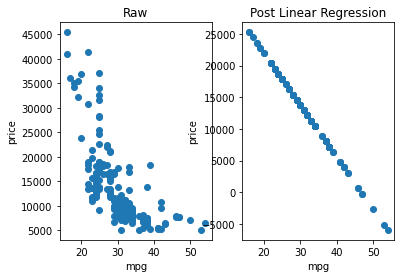

In [61]:
Yhat = lm.predict(X)
#the first 5 prices
#y-intercept, slope
print(lm.intercept_)
print(lm.coef_)

#to be interpreted as, hence the straight line equation can be estimated: 
#yhat = lm.coeff * X + lm.intercept_
plt.subplot(1,2,1)
plt.title("Raw")
plt.xlabel("mpg")
plt.ylabel("price")
plt.scatter(X,Y)

plt.subplot(1,2,2)
plt.title("Post Linear Regression")
plt.xlabel("mpg")
plt.ylabel("price")
plt.scatter(X,Yhat)


In [62]:
#Multiple Linear Regression
#yhat = A + B1X1 + B2X2 ... XnXn (linear function)
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
print(lm.intercept_)
print(lm.coef_)


-15806.624626329205
[53.49574423  4.70770099 81.53026382 36.05748882]


(0.0, 48151.04748107654)

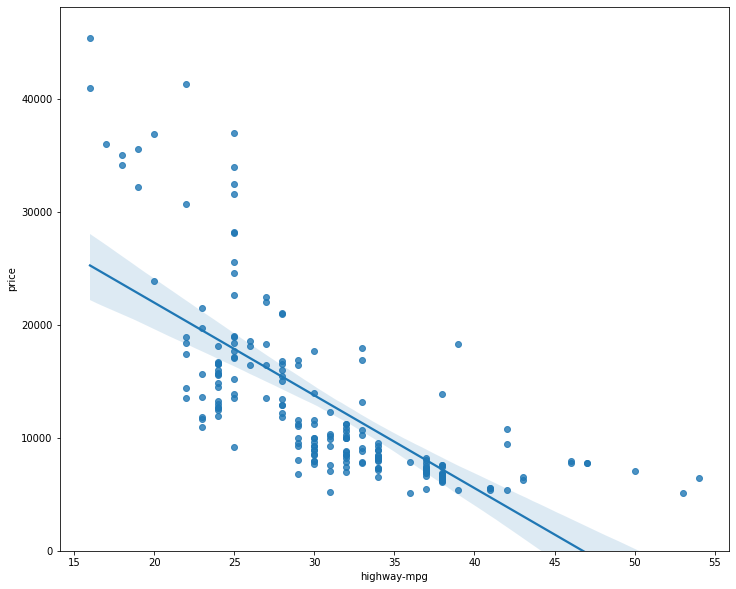

In [55]:
#Model Evaluation using Visualization
import seaborn as sns
%matplotlib inline 


width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

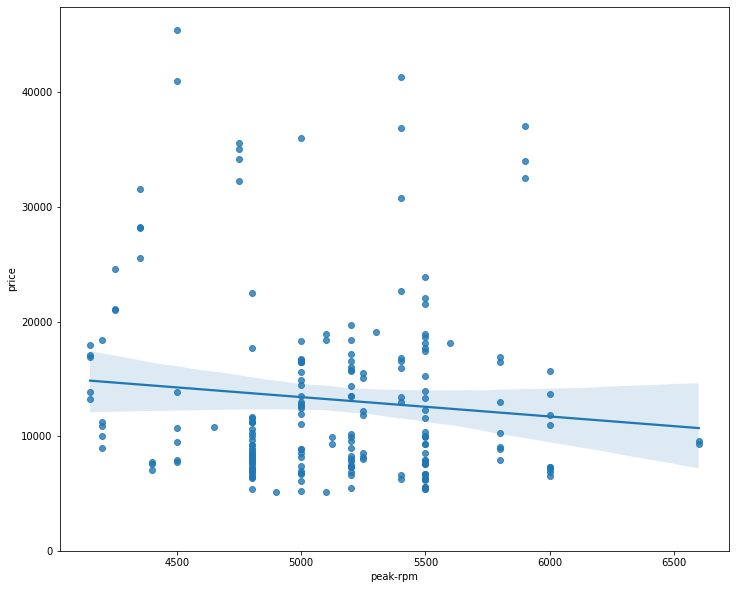

In [63]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [64]:
#highway-mpg has more points closer to the generated line. whereas peak-rpm is more spread.

df[["peak-rpm","highway-mpg","price"]].corr()
#highway mpg has stronger correlation with price

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


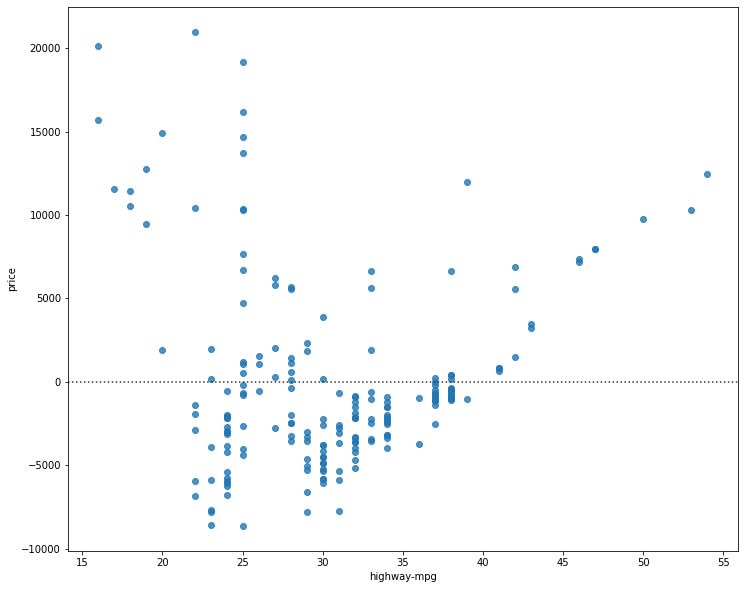

In [65]:
#Residual Plot
# e (residual) y, observed - yhat, predicted. the residual is the distance between is the distance between the data point to the fitted regression line
# a good model would be randomly spread  out on x-axis, meaning linear model is appropriate as the variance is constant, thus the model is a good fit.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()
# here it is more bias in the negative/bad spread.

<ipython-input-68-fdc1616d8346>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-68-fdc1616d8346>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

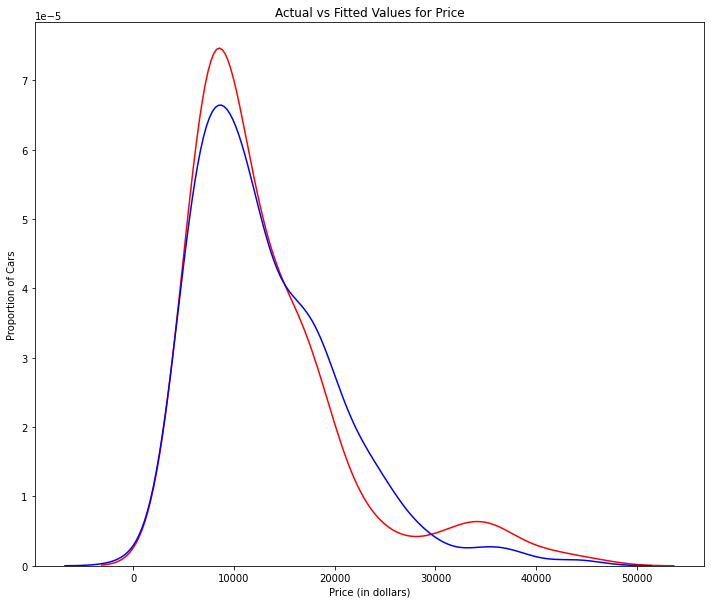

In [68]:
#Distribution plots for Multiple Linear Regression
#compare the actual vs predicteted values. the overlap means its accurate.
Y_hat = lm.predict(Z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


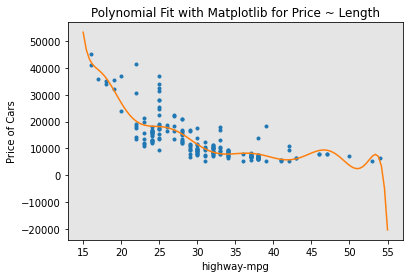

In [73]:
#Polynomial Regression (non-linear)
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()



x = df['highway-mpg']
y = df['price']

#3rd argument refers to the degree of polynomial
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'highway-mpg')





In [71]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [74]:
#For Multiple Variante Polynomial Functions use polynomial transformation
# yhat = a + b1x1+ b2x2 + b3x1x2 + b4x1^2 + b5x2^2

from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr


PolynomialFeatures()

In [75]:
Z_pr=pr.fit_transform(Z)

In [77]:
print(Z.shape)
print(Z_pr.shape)
#201 samples, 4 and 15 features pre-post transformation


#yhat = ax^2 + bx^2 + cx^2 + dx^2 + exy + fxz + gxy + hxz + iyz + jyz + kxy + lxz + mxy + nxz + pxyz + q
# number of coefficients = (n+d)! / (d! * n!), n, number of variables, highest order of degree


(201, 4)
(201, 15)


In [80]:
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [81]:
#Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


#pipeline, created by list of tuples, including the name of model, and constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

pipe=Pipeline(Input)
pipe


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [86]:
Z = Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [87]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [88]:
# pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h3> Measures of In-Sample Evaluation </h3>
<u> R^2 </u>
<p>
or coefficient of determinationm indicates how close data is to fitted regression line.
the value is the % of variation of the response variable y
</p>

<u> MSE (Mean Square Error) </u> 
<p>
measures avg. of squares of errors. difference between y and yhat
</p>



In [89]:
#1.simple linear regression
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [90]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]
The mean square error of price and predicted value is:  31635042.944639888


In [91]:
#2.multiple linear regression
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The R-square is:  0.8093562806577457
The mean square error of price and predicted value using multifit is:  11980366.87072649


In [92]:
#3.polynomial fit
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
mean_squared_error(df['price'], p(x))

The R-square value is:  0.7023769099037749


18703127.597667325

<h3> Prediction and Decision Making </h3>
<p> fit is used to train, predict for prediction. pyplot for plotting.
Conclusion MLR is chosen model as MSE is smaller and R^2 is largest.